# AdaGrad

Each parameter (feature) gets its own learning rate, and that learning rate shrinks over time based on how often the parameter is updated.

> Frequent features → smaller steps

> Rare features → larger steps

This is called **feature-wise learning rate**.

#### Example

**Task: Spam detection using bag-of-words**

Words:

- “the” → appears in almost every email

- “win” → appears sometimes

- “lottery” → appears rarely but very important

What AdaGrad does:
- “the” gets many updates → learning rate becomes very small
- “lottery” gets few updates → learning rate stays large

✅ Rare but important words learn faster

❌ Common words don’t dominate learning

> **Limitation**: Learning rates keep shrinking forever. Steps become very small leading to training almost stops.

---

# RMSProp (Root Mean Square Propagation)

**RMSProp fixes AdaGrad’s main problem.**

Although AdaGrad slows down a bit too fast and ends up never converging to the
global optimum, the RMSProp algorithm fixes this by accumulating only the gradients from the most recent iterations (as opposed to all the gradients since the beginning of training).

> Instead of remembering all past gradients, it remembers only recent gradients

> So learning rates adapt per feature (do not shrink forever).

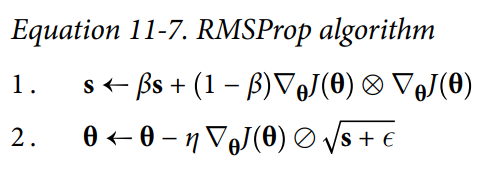

The decay rate β is typically set to 0.9. Yes, it is once again a new hyperparameter, but
this default value often works well, so you may not need to tune it at all.
As you might expect, Keras has an RMSProp optimizer:

```python
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
```

---

# Adam Optimization

**Title**: Adam: A Method for Stochastic Optimization

**Authors**: ```Diederik P. Kingma, Jimmy Ba```

https://arxiv.org/abs/1412.6980

Adam which stands for adaptive moment estimation, combines the ideas of Momentum optimization and RMSProp:

- like Momentum optimization it keeps track of an exponentially decaying average of past gradients (**remembers direction**), and
- like RMSProp it keeps track of an exponentially decaying average of past squared gradients (**adapts learning rate per parameter**)



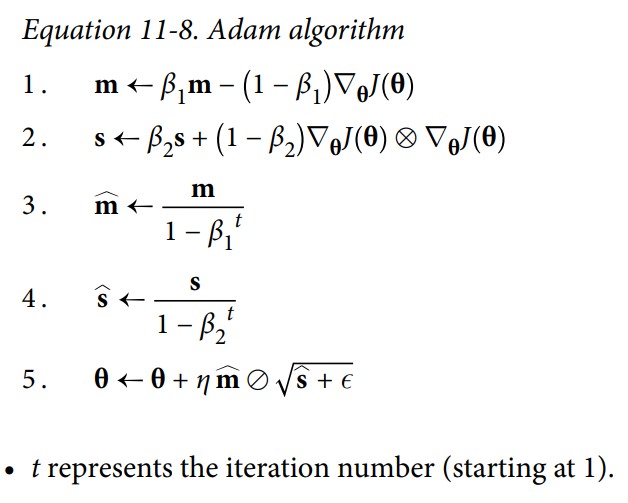

### Default hyperparameters (usually don’t change)

β₁ = 0.9 → how much momentum to keep

β₂ = 0.999 → how smooth the adaptive learning rate is

ε = 1e-7 → small number to avoid division by zero

---

Learning rate

Adam is adaptive, so it needs less tuning.

Default learning rate η = 0.001 works well for most problems.

```python
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
```

These are the default values for the Adam class to be precise, **epsilon** defaults to None, which tells Keras to use ```keras.backend.epsilon()``` which defaults to 10–7.

You can change it using ```keras.backend.set_epsilon()```

### Nadam Optimization

> Nadam = Adam + Nesterov (look-ahead, adjust direction)

---

## **Why Deep Learning Uses Simple Optimizers**

Most optimization methods used in deep learning, such as Gradient Descent, Momentum, and Adam, rely on first-order derivatives, also called gradients. Gradients tell the model which direction to move to reduce error, and they are relatively cheap to compute.

There are **more advanced optimization methods** that use second-order derivatives, known as **Hessians**. These methods can understand not only the direction of the slope but also the curvature of the loss surface, which can help find better solutions faster in theory.

> However, in practice, Hessians are a big problem for deep neural networks. If a model has n parameters, it needs n² values to store Hessians, but only n values to store gradients. Modern neural networks often have tens or hundreds of thousands of parameters, so Hessians quickly become too large to fit in memory. Even when memory is not an issue, computing them is extremely slow.

Because of these limitations, second-order optimization methods are rarely used in deep learning. Instead, simpler first-order methods are preferred because they are fast, memory-efficient, and scale well to large neural networks.

In short: second-order methods are powerful in theory, but first-order methods are practical in real-world deep learning.

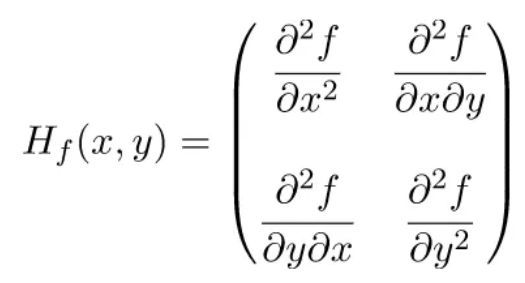

---